<a href="https://colab.research.google.com/github/MohdIstiaqHossainJunaid/Bangla-Hate-Speech-Detection-In-videos/blob/main/CSE419(Deep_learning_Techiniques).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bangla Hate Speech Detection from videos**(Deep Learning Techniques)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(8)
import string 
import cufflinks as cf
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(1)





In [ ]:
import pandas as pd
import io
df = pd.read_csv("/content/drive/MyDrive/Playing with Data/CSE419 (Hate Speech Detection From videos)/Bangla Hate Speech Dectection.csv")


## Removing punctuations

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [ ]:
df['msg_clean'] = df['Speech'].apply(lambda x:remove_punctuation(x))
df.head()

,Serial,Youtube_ID,Speech,Label,msg_clean
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,এত রাত BNP রা এখানে যে গালাগালি দেতাসে এক কিন্...
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি নির্লজ্জ বে...
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর ত...


In [ ]:
pip install bnlp_toolkit

## **Bangla Tokenization and Bangla Stopword Removing**

In [ ]:
from bnlp import BasicTokenizer
basic_tokenizer = BasicTokenizer()

df['tokenized'] = df['msg_clean'].apply(lambda x: basic_tokenizer.tokenize(x))


In [ ]:
import csv
stop_words='/content/drive/MyDrive/Playing with Data/CSE419 (Hate Speech Detection From videos)/stopwords-bn.txt'
text_data=[]
with open(stop_words,'r',encoding='utf-8') as temp_output_file:
    reader=csv.reader(temp_output_file, delimiter='\n')
    for row in reader:
        text_data.append(row)
stop_word_list=[x[0] for x in text_data]
print(stop_word_list[0:100])
print(type(stop_word_list))

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে']
<class 'list'>


In [ ]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

df['Removed Stopped word'] = df['msg_clean'].apply(lambda x: remove_stopwords(x,stopwords))
df 

,Serial,Youtube_ID,Speech,Label,msg_clean,tokenized,Removed Stopped word
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,এত রাত BNP রা এখানে যে গালাগালি দেতাসে এক কিন্...,"[এত, রাত, BNP, রা, এখানে, যে, গালাগালি, দেতাসে...","[রাত, BNP, রা, গালাগালি, দেতাসে, এক, Facebook,..."
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,"[জীবনের, যারা, মুক্তি, চাইতেছে, আমি, তারা, বাই...","[জীবনের, মুক্তি, চাইতেছে, বাইরে, আসো, কথাবার্ত..."
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি নির্লজ্জ বে...,"[আচ্ছা, ও, কি, একদম, পাগল, হয়ে, গেল, নাকি, নি...","[আচ্ছা, একদম, পাগল, নির্লজ্জ, বেহায়া, ছোটলোক,..."
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,"[আমাকে, পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার...","[পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার, জামা,..."
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর ত...,"[এ, সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়...","[সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়াই,..."
...,...,...,...,...,...,...,...
187,188,https://www.youtube.com/watch?v=gYs1hny8j7s,কালকিনি উপজেলার ডাসার থানা পূর্ব বদলা গ্রামের ...,0,কালকিনি উপজেলার ডাসার থানা পূর্ব বদলা গ্রামের ...,"[কালকিনি, উপজেলার, ডাসার, থানা, পূর্ব, বদলা, গ...","[কালকিনি, উপজেলার, ডাসার, থানা, পূর্ব, বদলা, গ..."
188,189,https://www.youtube.com/watch?v=bwR3C_qIYyQ,হবিগঞ্জের বানিয়াচক উপজেলার জল মোহন নিয়ে কামা...,0,হবিগঞ্জের বানিয়াচক উপজেলার জল মোহন নিয়ে কামা...,"[হবিগঞ্জের, বানিয়াচক, উপজেলার, জল, মোহন, নিয়...","[হবিগঞ্জের, বানিয়াচক, উপজেলার, জল, মোহন, কামা..."
189,190,https://www.youtube.com/watch?v=KiP8gWUK83M,অব্যবস্থাপনা নিয়ে টিকা প্রত্যাশীদের এই ক্ষোভ....,0,অব্যবস্থাপনা নিয়ে টিকা প্রত্যাশীদের এই ক্ষোভ ...,"[অব্যবস্থাপনা, নিয়ে, টিকা, প্রত্যাশীদের, এই, ...","[অব্যবস্থাপনা, টিকা, প্রত্যাশীদের, ক্ষোভ, ভোর,..."
190,191,https://www.youtube.com/watch?v=NrIUfA6RZJk&ab...,এই শিশু কিশোরদের আটক করা হয়েছে কক্সবাজার থেকে...,0,এই শিশু কিশোরদের আটক করা হয়েছে কক্সবাজার থেকে...,"[এই, শিশু, কিশোরদের, আটক, করা, হয়েছে, কক্সবাজ...","[শিশু, কিশোরদের, আটক, কক্সবাজার, চট্টগ্রাম, আস..."


In [ ]:
df['sentence']=df['Removed Stopped word'].apply(' '.join)
df.head()

,Serial,Youtube_ID,Speech,Label,msg_clean,tokenized,Removed Stopped word,sentence
0,1,https://www.youtube.com/watch?v=_IzHIQvdohs,"এত রাত, BNP রা এখানে যে গালাগালি দেতাসে এক কিন...",1,এত রাত BNP রা এখানে যে গালাগালি দেতাসে এক কিন্...,"[এত, রাত, BNP, রা, এখানে, যে, গালাগালি, দেতাসে...","[রাত, BNP, রা, গালাগালি, দেতাসে, এক, Facebook,...",রাত BNP রা গালাগালি দেতাসে এক Facebook থাকতেও ...
1,2,https://www.youtube.com/watch?v=2-ndr2h28jY,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,1,জীবনের যারা মুক্তি চাইতেছে আমি তারা বাইরে আসো ...,"[জীবনের, যারা, মুক্তি, চাইতেছে, আমি, তারা, বাই...","[জীবনের, মুক্তি, চাইতেছে, বাইরে, আসো, কথাবার্ত...",জীবনের মুক্তি চাইতেছে বাইরে আসো কথাবার্তা পরিম...
2,3,https://www.youtube.com/watch?v=88loU_FL5MM,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি? নির্লজ্জ ব...,1,আচ্ছা ও কি একদম পাগল হয়ে গেল নাকি নির্লজ্জ বে...,"[আচ্ছা, ও, কি, একদম, পাগল, হয়ে, গেল, নাকি, নি...","[আচ্ছা, একদম, পাগল, নির্লজ্জ, বেহায়া, ছোটলোক,...",আচ্ছা একদম পাগল নির্লজ্জ বেহায়া ছোটলোক বাজদার...
3,4,https://www.youtube.com/watch?v=bMYKQydmWCE,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,1,আমাকে পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা ক...,"[আমাকে, পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার...","[পরিমরি, খান, তুই, গণভবনে, শেখ, হাসিনার, জামা,...",পরিমরি খান তুই গণভবনে শেখ হাসিনার জামা কাপড় ধ...
4,5,https://www.youtube.com/watch?v=E_EQzQf2TLY,"এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর, ...",1,এ সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর ত...,"[এ, সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়...","[সেফাতুল্লার, কারে, শালা, তুই, বেয়াই, বেয়াই,...",সেফাতুল্লার কারে শালা তুই বেয়াই বেয়াই কর তুই...


In [ ]:
df['Label'].value_counts()

0    99
1    93
Name: Label, dtype: int64

##text to sequence

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Speech'].values,df['Label'].values,test_size=0.30)

In [ ]:
print('speech:',x_train[0])
print('hate or good:',y_train[0])

speech: কি বলছো? হুম? তোর আম্মু কে? আমার আম্মুকে তোমার কি আছে? দেখি তোমার ঐটা আছে? আমার আব্বু যেইটা আছে তাহলে তাহলে যে বলো সব ভিডিও করছে তাহলে? তাহলে বলছ কেন? যেটা পারবা না সেটা কেন? তুমি বল আমার মায়ের চুলসিড়া দিবা, এটা পারতে পারো, কিন্তু এইসব কি? আংলা লাগানো যায়, আগলা লাগা. কোন নলেজ আছে তুই লাগাস? ও then then mode সোনাই সোনাই সোনাই অর্ণব তুমি হিরো তুমি. ইমন, নিরব. ইমন. এই ছুত মার, আমি ইমন আমার boyfriend না. একদম লাইকি
hate or good: 1


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab=20000
tokenizer=Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [ ]:
wordinx=tokenizer.word_index
v=len(wordinx)
print('The size of dataset vocab is:',v)

The size of dataset vocab is: 7832


In [ ]:
train_seq =tokenizer.texts_to_sequences(x_train)
test_seq=tokenizer.texts_to_sequences(x_test)
print('training sequence:',train_seq[0])
print('testing sequence:',test_seq[0])

training sequence: [6, 2029, 165, 11, 1440, 73, 5, 3222, 94, 6, 16, 190, 94, 3223, 16, 5, 3224, 3225, 16, 62, 62, 9, 532, 63, 203, 111, 62, 62, 1441, 88, 390, 3226, 1, 137, 88, 57, 271, 5, 315, 3227, 3228, 41, 3229, 533, 23, 352, 6, 3230, 3231, 42, 3232, 2030, 59, 3233, 16, 13, 3234, 14, 1442, 1442, 3235, 1097, 1097, 1097, 3236, 57, 3237, 57, 1443, 3238, 1443, 2, 3239, 353, 4, 1443, 5, 3240, 1, 204, 3241]
testing sequence: [1580, 131, 5, 567, 4, 991, 4, 6093, 8, 129, 139, 1580, 131, 4, 8, 326, 1045, 332, 677, 2416, 25, 326, 991, 9, 736, 88, 225, 1524, 233, 57, 671, 671, 225, 244, 103, 369, 19, 56, 5, 90, 34]


In [ ]:
pad_train =pad_sequences(train_seq)
T=pad_train.shape[1]
print("The length of the trainging sequence is :",pad_train.shape[1])

The length of the trainging sequence is : 599


In [ ]:
pad_test =pad_sequences(test_seq,maxlen=T)
print("The length of testing sequence is ",pad_test.shape[1])

The length of testing sequence is  599


##Deep LearninG techniques ( Pretrained Model(LSTM, GRU))

**LSTM**

In [ ]:
from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,GlobalMaxPool1D
from tensorflow.keras.models import Model
D=20
M=15

i= Input(shape=(T, ))
x=Embedding(v+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(32,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 599)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 599, 20)           156660    
_________________________________________________________________
lstm_1 (LSTM)                (None, 599, 15)           2160      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 159,365
Trainable params: 159,365
Non-trainable params: 0
_____________________________________________________

In [ ]:
r=model.fit(pad_train,y_train,validation_data=(pad_test,y_test),epochs=20)

Epoch 1/20
5/5 [==============================] - 4s 395ms/step - loss: 0.6933 - accuracy: 0.5373 - val_loss: 0.6936 - val_accuracy: 0.4655
Epoch 2/20
5/5 [==============================] - 1s 269ms/step - loss: 0.6894 - accuracy: 0.5373 - val_loss: 0.6927 - val_accuracy: 0.4655
Epoch 3/20
5/5 [==============================] - 1s 270ms/step - loss: 0.6861 - accuracy: 0.5373 - val_loss: 0.6921 - val_accuracy: 0.4655
Epoch 4/20
5/5 [==============================] - 1s 271ms/step - loss: 0.6823 - accuracy: 0.5373 - val_loss: 0.6916 - val_accuracy: 0.4655
Epoch 5/20
5/5 [==============================] - 1s 273ms/step - loss: 0.6773 - accuracy: 0.5373 - val_loss: 0.6903 - val_accuracy: 0.4655
Epoch 6/20
5/5 [==============================] - 1s 270ms/step - loss: 0.6713 - accuracy: 0.5373 - val_loss: 0.6882 - val_accuracy: 0.4655
Epoch 7/20
5/5 [==============================] - 1s 265ms/step - loss: 0.6630 - accuracy: 0.5373 - val_loss: 0.6852 - val_accuracy: 0.4655
Epoch 8/20
5/5 [====

In [ ]:
loss,accuracy = model.evaluate(pad_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

2/2 [==============================] - 0s 43ms/step - loss: 0.4025 - accuracy: 0.9138
loss: 0.40249067544937134
Accuracy: 0.9137930870056152


<function matplotlib.pyplot.legend>

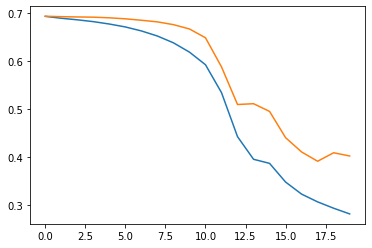

In [ ]:
from matplotlib import pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend

**GRU**

In [ ]:
from tensorflow.keras.layers import Input,Dense,Embedding,GRU,GlobalMaxPool1D
from tensorflow.keras.models import Model
D=20
M=15

i= Input(shape=(T, ))
x=Embedding(v+1,D)(i)
x=GRU(M,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(32,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
gru_model=Model(i,x)
gru_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 599)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 599, 20)           156660    
_________________________________________________________________
gru (GRU)                    (None, 599, 15)           1665      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 158,870
Trainable params: 158,870
Non-trainable params: 0
_____________________________________________________

In [ ]:
gru_model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
r=gru_model.fit(pad_train,y_train,validation_data=(pad_test,y_test),epochs=20)

Epoch 1/20
5/5 [==============================] - 5s 528ms/step - loss: 0.6915 - accuracy: 0.5373 - val_loss: 0.6939 - val_accuracy: 0.4655
Epoch 2/20
5/5 [==============================] - 1s 283ms/step - loss: 0.6848 - accuracy: 0.5373 - val_loss: 0.6902 - val_accuracy: 0.4655
Epoch 3/20
5/5 [==============================] - 1s 291ms/step - loss: 0.6787 - accuracy: 0.5373 - val_loss: 0.6875 - val_accuracy: 0.4655
Epoch 4/20
5/5 [==============================] - 1s 295ms/step - loss: 0.6719 - accuracy: 0.5373 - val_loss: 0.6849 - val_accuracy: 0.4655
Epoch 5/20
5/5 [==============================] - 1s 288ms/step - loss: 0.6633 - accuracy: 0.5373 - val_loss: 0.6805 - val_accuracy: 0.4655
Epoch 6/20
5/5 [==============================] - 1s 286ms/step - loss: 0.6526 - accuracy: 0.5896 - val_loss: 0.6747 - val_accuracy: 0.4828
Epoch 7/20
5/5 [==============================] - 1s 296ms/step - loss: 0.6399 - accuracy: 0.8806 - val_loss: 0.6686 - val_accuracy: 0.5172
Epoch 8/20
5/5 [====

In [ ]:
model.save('GRU.h5')

<function matplotlib.pyplot.legend>

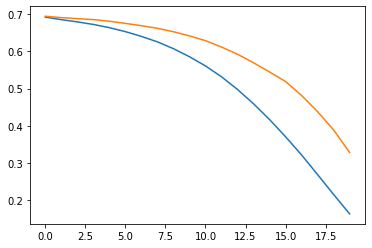

In [ ]:
from matplotlib import pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend

##ROC Curve

**GRU**

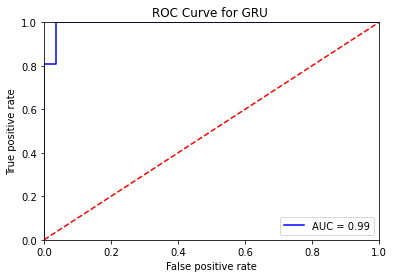

In [ ]:
    predictions = gru_model.predict(pad_test).ravel()
    fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(y_test, predictions)
    auc_keras = metrics.auc(fpr_keras, tpr_keras)
    
    plt.figure(1)
    plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve for GRU ')
    plt.show()

**LSTM**

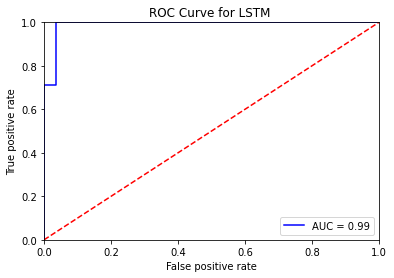

In [ ]:
    predictions = model.predict(pad_test).ravel()
    fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(y_test, predictions)
    auc_keras = metrics.auc(fpr_keras, tpr_keras)
    
    plt.figure(1)
    plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve for LSTM ')
    plt.show()